Домашнее задание "Визуализация данных в Python"
Преподаватель: Олег Булыгин
Что делать

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [9]:
import pandas as pd
import seaborn as sns

In [10]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [11]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [12]:
movies.release_date = pd.to_datetime(movies['release_date'])
movies["year"] = movies.release_date.dt.year

In [13]:
from pandas.io.json import json_normalize
import json
def json_decode(data,key):
    result = []
    data = json.loads(data) 
    for item in data:
        result.append(item[key])
    if len(result)>0:
        return result[0]
    return ''

In [14]:
#Сделано упрощение - учитываем только первое значение для списков значений
movies.genres = movies.genres.apply(json_decode,key='name')
movies.keywords = movies.keywords.apply(json_decode,key='name')
movies.production_companies = movies.production_companies.apply(json_decode,key='name')
movies.production_countries = movies.production_countries.apply(json_decode,key='name')


In [15]:
movies.budget = movies.budget/1000000.0
movies.revenue = movies.revenue/1000000.0

In [16]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237.0,Action,http://www.avatarmovie.com/,19995,culture clash,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,...,2009-12-10,2787.965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0
1,300.0,Adventure,http://disney.go.com/disneypictures/pirates/,285,ocean,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,...,2007-05-19,961.000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0
2,245.0,Action,http://www.sonypictures.com/movies/spectre/,206647,spy,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Columbia Pictures,...,2015-10-26,880.674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0


### График 1
Распределение значений количественных переменных и попарная взаимосвязь между ними
Переменные, которые рассматриваем: budget, revenue, runtime, popularity, vote_average

C:\Users\l.nagovicina\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\l.nagovicina\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


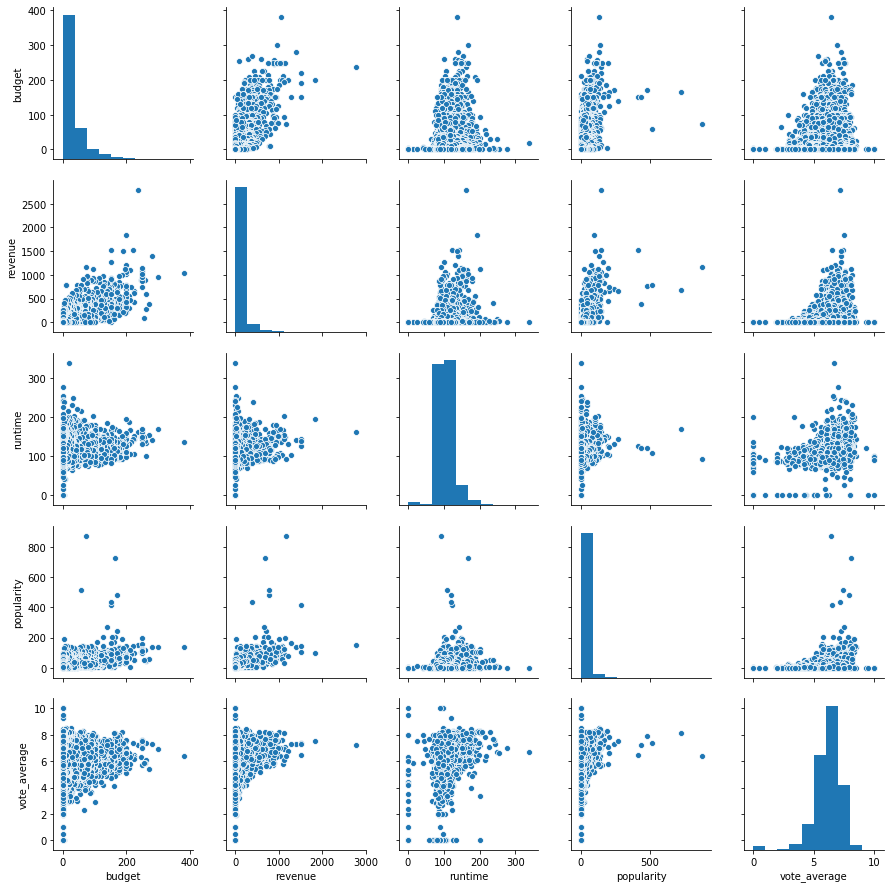

In [17]:
sns_plot = sns.pairplot(
    movies[['budget', 'revenue', 'runtime', 'popularity', 'vote_average']])
sns_plot

### График 2
Взаимосвязь и линия регрессии между переменными budget и vote_average

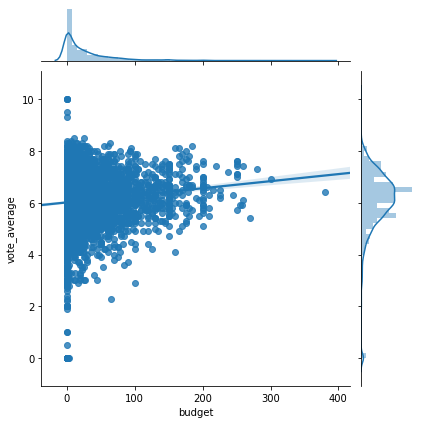

In [18]:
sns.jointplot(x='budget', y='vote_average', data=movies, kind='reg')

## График 3
Карта корреляции между количественными переменными budget, revenue, runtime, popularity, vote_average

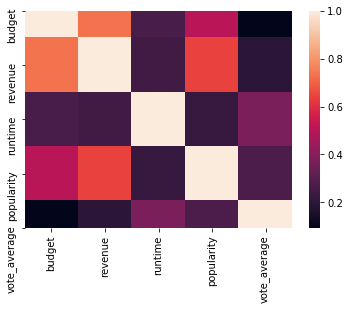

In [19]:
ax = sns.heatmap(movies[['budget', 'revenue', 'runtime', 'popularity', 'vote_average']].corr())

### График 4 
Агрегированные значения переменных budget и revenue в разрезе года выпуска фильма

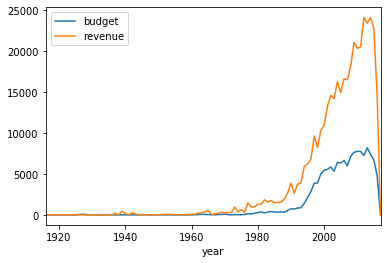

In [20]:
df1 = movies[['budget', 'revenue','year']].groupby('year').sum()
df1.plot()

### График 5
Распределение значений переменной budget в зависимости от жанра фильма (учитываем только один жанр для каждого фильма)

In [21]:
movies.genres.unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Science Fiction',
       'Drama', 'Thriller', 'Family', 'Comedy', 'History', 'War',
       'Western', 'Romance', 'Crime', 'Mystery', 'Horror', 'Documentary',
       'Music', 'TV Movie', '', 'Foreign'], dtype=object)

In [23]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [24]:
data = []

for genre in movies.genres.unique():
    data.append(
        go.Box(y=movies[movies.genres==genre].budget, 
               name=genre)
    )
iplot(data, show_link = False)

### График 6
Суммарный показатель budget в разрезе страны (production_countries), которая выпустила фильм (учитваем одну страну для фильма)

In [25]:
revenue_country_df = movies.groupby('production_countries')[['revenue']].sum()
count_country_df = movies.groupby('production_countries')[['title']].count()
country_df = revenue_country_df.join(count_country_df)
country_df.columns = ['revenue', 'Number_of_Movies']
country_df.sort_values('revenue', inplace=True, ascending = False)
country_df = country_df.head(20)

In [26]:
trace0 = go.Bar(
    x=country_df.index,
    y=country_df.revenue,
    name='revenue',
    orientation = 'v'
)

data = [trace0]
layout = {'title': 'Platforms share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)